### Regresion Lineal: Coste de un incidente de seguridad


#### Enunciado

Predecir el coste de un incidente de seguridad dado el numero de equipos afectados. Para entrenar al algoritmo se uso un conjunto de datos randoms

**1. Generar el conjunto de datos**

In [115]:
import numpy as np

X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.rand(100, 1)

print("La longuitud de conjunto de datos es: ", len(X))

La longuitud de conjunto de datos es:  100


**2. Visualizacion de datos**

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

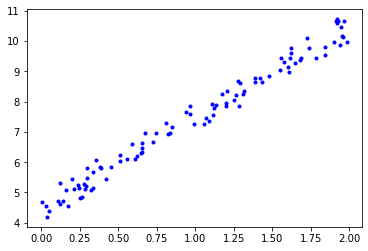

In [117]:
plt.plot(X, Y, "b.")
plt.show()

Text(0, 0.5, 'Coste de incidente (u/1000)')

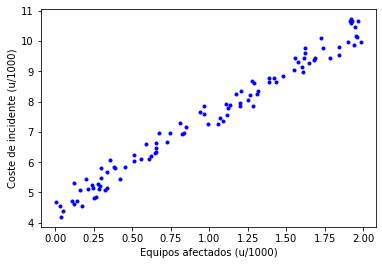

In [118]:
plt.plot(X, Y, "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Coste de incidente (u/1000)")

**3. Modificacion del conjunto de datos**

In [119]:
import pandas as pd

In [120]:
data = { 'n_equipos_afectados': X.flatten(), 'coste': Y.flatten() }
df = pd.DataFrame(data)
df.head(10)

,n_equipos_afectados,coste
0,0.027302,4.537861
1,1.293745,8.610296
2,1.119689,7.802952
3,1.112354,7.542437
4,1.983763,9.979822
5,0.288183,5.206770
6,1.623763,9.769993
7,0.673286,6.947290
8,0.655231,6.633068
9,1.175950,8.239251


In [121]:
# Escalado de equipos afectados
df[ 'n_equipos_afectados' ] = df[ 'n_equipos_afectados' ] * 1000
df[ 'n_equipos_afectados' ] = df[ 'n_equipos_afectados' ].astype('int')
#Escalado de coste
df[ 'coste' ] = df[ 'coste' ] * 1000
df[ 'coste' ] = df[ 'coste' ].astype('int')

df.head(10)


,n_equipos_afectados,coste
0,27,4537
1,1293,8610
2,1119,7802
3,1112,7542
4,1983,9979
5,288,5206
6,1623,9769
7,673,6947
8,655,6633
9,1175,8239


Text(0, 0.5, 'Coste de incidente')

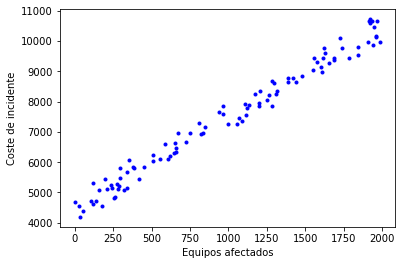

In [122]:
#Representacion del conjunto de datos
plt.plot( df['n_equipos_afectados'], df[ 'coste' ], "b." )
plt.xlabel("Equipos afectados")
plt.ylabel("Coste de incidente")

**4. Construccion del modelo**

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
#Construccion del modelo y ajuste de la funcion hipotesis
lin_reg = LinearRegression()
# Entrenar ( Variables de entrada, variable de salida )
lin_reg.fit( df["n_equipos_afectados"].values.reshape(-1, 1), df["coste"].values )

LinearRegression()

In [125]:
# Parametro Theta 0
lin_reg.intercept_ 

4469.286964133584

In [126]:
# Parametro Theta 1
lin_reg.coef_

array([3.00972676])

In [127]:
# Prediccion del valor minimo y maximo del conjunto de datos de entrenamiento
X_min_max = np.array( [[df["n_equipos_afectados"].min()], [df["n_equipos_afectados"].max()]] )
Y_train_pred = lin_reg.predict(X_min_max)

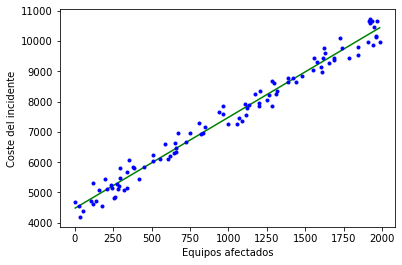

In [128]:
# Representacion grafica de la funcion hipotesis generada
plt.plot(X_min_max, Y_train_pred, "g-")
plt.plot( df['n_equipos_afectados'], df[ 'coste' ], "b." )
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

**5. Prediccion de nuevos valores**

In [141]:
x_news = np.array([[1200], [930]]) # 1200 equipos afectados

# Prediccion del coste que tendria el incidente
costes = lin_reg.predict(x_news)
print("El coste de los incidentes seria: ", costes, 'euros')

El coste de los incidentes seria:  [8080.95907644 7268.33285117] euros


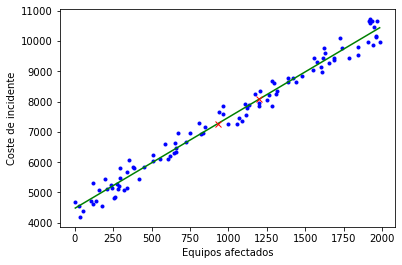

In [142]:
plt.plot(df["n_equipos_afectados"], df["coste"], 'b.')
plt.plot(X_min_max, Y_train_pred, "g-")
plt.plot(x_new, coste, 'rx')
plt.xlabel("Equipos afectados")
plt.ylabel("Coste de incidente")
plt.show()